In [1]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
dim = 4
structure = np.zeros((dim, dim), dtype=int)
for i in range(dim):
    for j in range(i+1):
        structure[i, j] = i+1
structure

array([[1, 0, 0, 0],
       [2, 2, 0, 0],
       [3, 3, 3, 0],
       [4, 4, 4, 4]])

In [17]:
from depimpact.model import Vine

In [18]:
vine = Vine(structure)
vine.build_new()

[1, 4] []
[2, 4] []
[3, 4] []
[1, 3] [4]
[2, 3] [4]
[1, 2] [3, 4]


In [154]:
class Tree(object):
    def __init__(self, dim, rank):
        self.dim = dim
        self.rank = rank
        self.nodes = []
        self.edges = []
        
class Vine(object):
    """
    """
    def __init__(self, structure):
        self.structure = structure
        dim = structure.shape[0]
        trees = []
        for i in range(dim-1):
            tree = Tree(dim=dim, rank=i)
            trees.append(tree)
        self.trees = trees
        self.dim = dim
        
    def build(self):
        dim = self.dim
        structure = self.structure
        tmp = structure.diagonal().tolist()
        self.trees[0].nodes = [([k], []) for k in tmp]
        # Explore the structure matrix
        for col in range(dim-1):
            # The other pairs
            rows = range(1+col, dim)[::-1]
            for k_tree, row in enumerate(rows):
                tree = self.trees[k_tree]
                i = structure[col, col]
                j = structure[row, col]
                conditionned = [i, j]
                conditionning = structure[row+1:, col].tolist()
                edge = (conditionned, conditionning)
                tree.edges.append(edge)
                
        for k_tree in range(dim-2):
            self.trees[k_tree+1].nodes = self.trees[k_tree].edges

vine = Vine(structure)
vine.build()

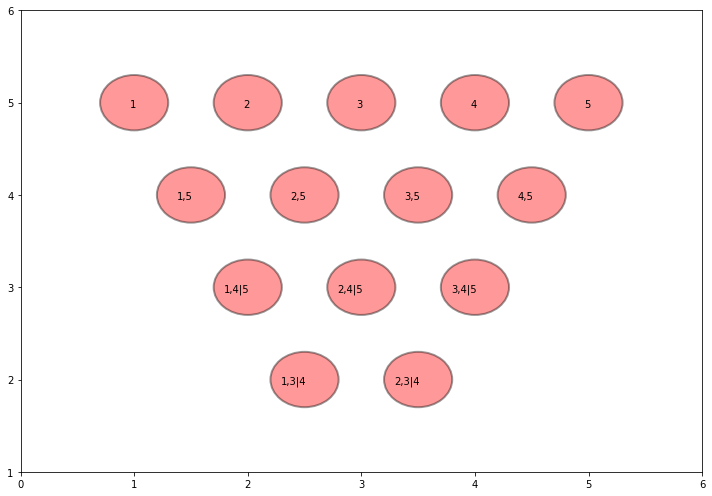

In [155]:
fig, ax = plt.subplots(figsize=(10, 7))

fontsize = 12
radius = 0.3
trees = vine.trees
for k_tree, tree in enumerate(trees):
    for k_node, node in enumerate(tree.nodes):
        xy = (k_node+k_tree*0.5+1, dim-k_tree)
        circle = plt.Circle(xy, radius, alpha=0.4, facecolor='r', edgecolor='k', ls='-', linewidth=2, fill=True)
        if k_tree == 0:
            text = '{}'.format(node[0][0])
        elif k_tree == 1:
            text = '{},{}'.format(node[0][0], node[0][1])
        else:
            text = '{},{}|{}'.format(node[0][0], node[0][1], node[1][0])
        ax.text(xy[0]-len(text)/fontsize/2, xy[1]-0.05, text)
        ax.add_artist(circle)
        
ax.set_xlim(0, dim+1)
ax.set_ylim(1, dim+1)
fig.tight_layout()

In [ ]:
class Tree(object):
    def __init__(self, structure):
        pass

In [34]:
trees = T
nodes = list(range(1, dim+1))
for col in range(dim-1):
    tree = {}
    tree['nodes'] = nodes
    edges = []
    for row_j in range(1+col, dim)[::-1]:
        i = structure[col, col]
        j = structure[row_j, col]
        conditionned = [i, j]
        conditionning = structure[row_j+1:, col].tolist()
        edge = (conditionned, conditionning)
        edges.append(edge)
    tree['edges'] = edges
    trees.append(tree)
    print(edges)

[([1, 4], []), ([1, 3], [4]), ([1, 2], [3, 4])]
[([2, 4], []), ([2, 3], [4])]
[([3, 4], [])]


In [23]:
tree_nodes = list(range(1, dim+1))
for i_tree in range(dim-1):
    conditionned_set = []
    conditionning_set = []
    for k in range(dim-i_tree-1):
        i = structure[k, k]
        row_j = dim-i_tree-1
        j = structure[row_j, k]
        conditionned_set.append([i, j])
        for l in range(dim-row_j):
            conditionning_set.append(structure[row_j-l, k])
        
    tree_edges = [conditionned_set, conditionning_set]
    print(tree_edges)

[[[1, 3], [2, 3]], [3, 3]]
[[[1, 2]], [2, 1]]
